In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [26]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [27]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [28]:
df.shape

(400, 11)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [30]:
#plotting histogram for sales data 
df.hist('Sales')

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

In [31]:
df.describe ()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Sales


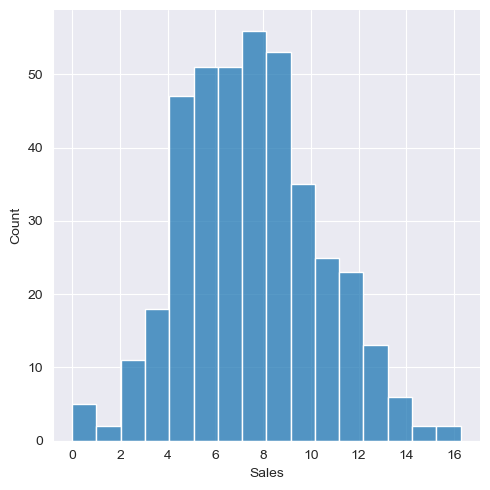

<Figure size 2000x700 with 0 Axes>

CompPrice


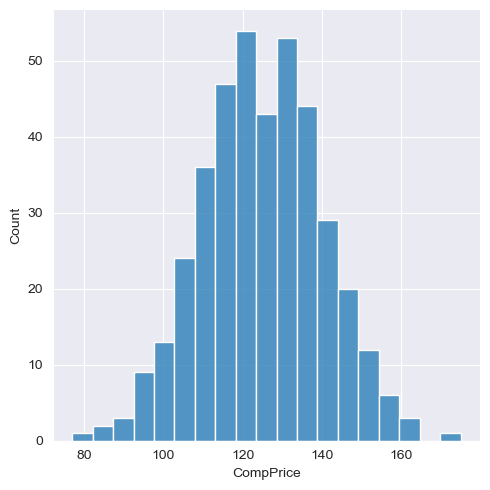

<Figure size 2000x700 with 0 Axes>

Income


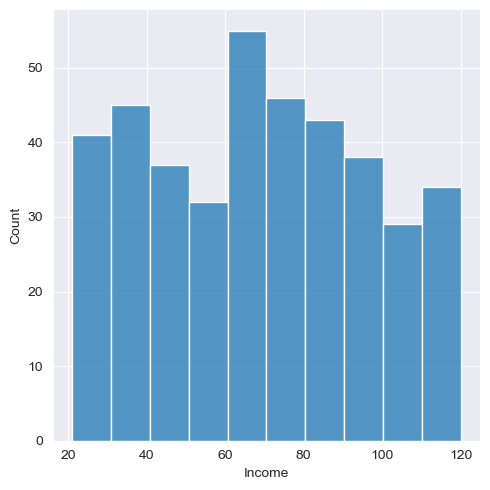

<Figure size 2000x700 with 0 Axes>

Advertising


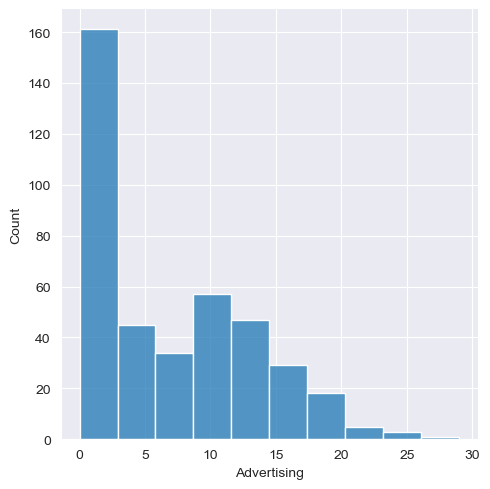

<Figure size 2000x700 with 0 Axes>

Population


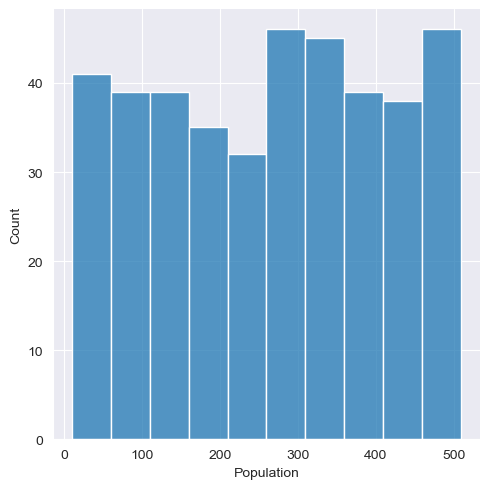

<Figure size 2000x700 with 0 Axes>

Price


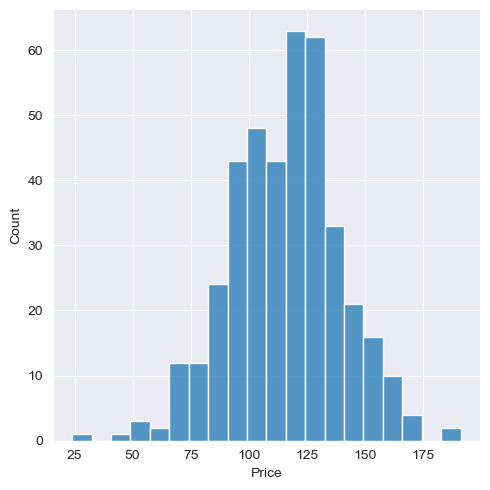

<Figure size 2000x700 with 0 Axes>

ShelveLoc


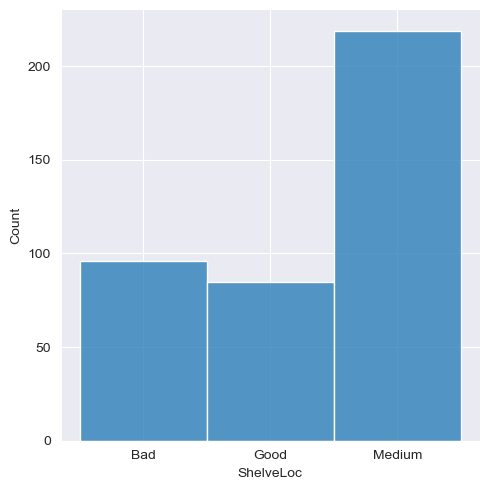

<Figure size 2000x700 with 0 Axes>

Age


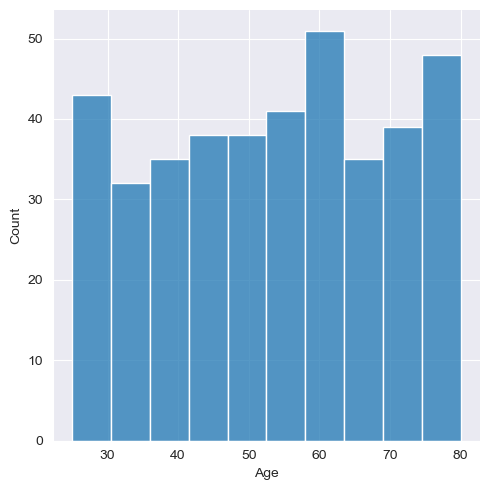

<Figure size 2000x700 with 0 Axes>

Education


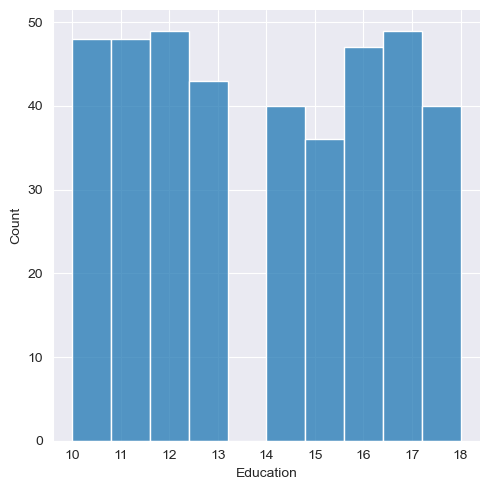

<Figure size 2000x700 with 0 Axes>

Urban


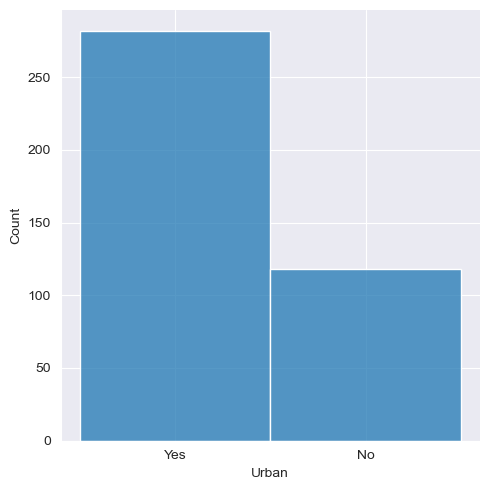

<Figure size 2000x700 with 0 Axes>

US


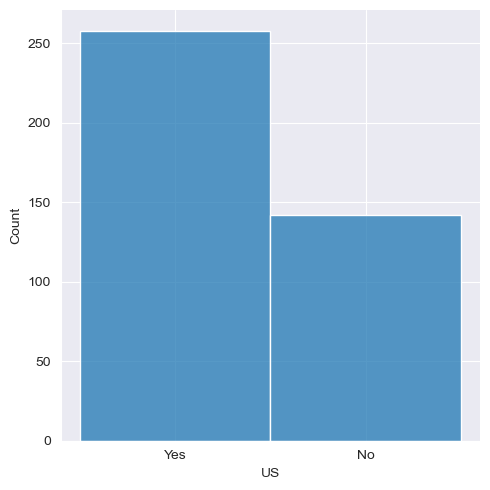

<Figure size 2000x700 with 0 Axes>

In [42]:
for n in df.columns:
    print(n)
    sns.displot(df[n])
    plt.figure(figsize=(20,7))
    plt.show()

In [45]:
df[df.duplicated()].shape

(0, 11)

In [46]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [47]:
encoder1=LabelEncoder()
df['ShelveLoc']=encoder1.fit_transform(df['ShelveLoc'])

<IPython.core.display.Javascript object>

In [48]:
df['Urban']=encoder1.fit_transform(df['Urban'])

In [49]:
df['US']=encoder1.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [50]:
df['Sales']=pd.cut(df['Sales'],bins=[0,5.42,10.84,17],labels=[0,1,2])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [51]:
df.isnull().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [52]:
df=df.dropna()

In [53]:
df.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int32
Age               int64
Education         int64
Urban             int32
US                int32
dtype: object

In [54]:
df.shape

(399, 11)

In [55]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [56]:
Y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    1
Name: Sales, Length: 399, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((319, 10), (80, 10), (319,), (80,))

In [58]:
from sklearn.model_selection import GridSearchCV
model=RandomForestClassifier()
parameters={"n_estimators":[50,100],"max_features":[4,6,8]}

<IPython.core.display.Javascript object>

In [59]:
grid=GridSearchCV(model,parameters,cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 6, 8], 'n_estimators': [50, 100]})

In [60]:
grid.best_score_

0.7336693548387097

In [61]:
grid.best_params_

{'max_features': 6, 'n_estimators': 50}

In [62]:
final_model=RandomForestClassifier(n_estimators=100,max_features=8,random_state=12)
final_model.fit(x_train,y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(max_features=8, random_state=12)

In [63]:
final_model.feature_importances_

array([0.13192628, 0.11412688, 0.07161346, 0.09553158, 0.25246391,
       0.14047924, 0.12287215, 0.04871089, 0.01273412, 0.0095415 ])

In [64]:
y_test_pred=final_model.predict(x_test)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0], dtype=int64)

In [65]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69        12
           1       0.90      0.76      0.82        62
           2       0.27      0.50      0.35         6

    accuracy                           0.75        80
   macro avg       0.59      0.70      0.62        80
weighted avg       0.81      0.75      0.77        80



In [67]:
num_trees = 100
max_features = 4
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean()*100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

74.2051282051282


In [69]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=2)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(results2.mean()*100)

<IPython.core.display.Javascript object>

77.71153846153845


In [70]:
seed = 10

cart = DecisionTreeClassifier()
num_trees = 100

In [72]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [73]:
model1 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results1 = cross_val_score(model1, X, Y, cv=kfold)
print(results1.mean()*100)

74.46794871794872


In [74]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results2 = cross_val_score(model2, X, Y, cv=kfold)
print(results2.mean()*100)

77.71153846153845


In [78]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
# Iteration = 1
estimators = []
model3 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model3))

model4 = DecisionTreeClassifier()
estimators.append(('cart', model4))

model5 = SVC()
estimators.append(('svm', model5))

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model6))

model7 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model7))

# create the ensemble modelIter
ensemble = VotingClassifier(estimators)
results3 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results3.mean()*100)

<IPython.core.display.Javascript object>

74.96153846153847


In [79]:
estimators = []
model8 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model8))

model9 = DecisionTreeClassifier()
estimators.append(('cart', model9))

model10 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
estimators.append(('bagging', model10))

model11 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model11))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results4 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results4.mean()*100)

<IPython.core.display.Javascript object>

75.69871794871794


In [80]:
estimators = []
model12 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model12))

model13 = DecisionTreeClassifier()
estimators.append(('cart', model13))

model14 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model14))

# create the ensemble modSel
ensemble = VotingClassifier(estimators)
results5 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results5.mean()*100)

<IPython.core.display.Javascript object>

75.7051282051282


In [81]:
#Iteration = 4
estimators = []
model15 = DecisionTreeClassifier()
estimators.append(('cart', model15))

model16 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model16))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

68.92307692307693


In [82]:
#Iteration = 5
estimators = []
model17 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model17))

model18 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model18))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results6 = cross_val_score(ensemble, X, Y, cv=kfold)
print(results6.mean()*100)

<IPython.core.display.Javascript object>

69.9423076923077
